<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-IcaData-object" data-toc-modified-id="Load-IcaData-object-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load IcaData object</a></span></li><li><span><a href="#Bar-plots" data-toc-modified-id="Bar-plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bar plots</a></span><ul class="toc-item"><li><span><a href="#Plot-Gene-Expression" data-toc-modified-id="Plot-Gene-Expression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot Gene Expression</a></span></li><li><span><a href="#Plot-iModulon-Activities" data-toc-modified-id="Plot-iModulon-Activities-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plot iModulon Activities</a></span></li><li><span><a href="#Plot-sample-metadata" data-toc-modified-id="Plot-sample-metadata-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot sample metadata</a></span></li></ul></li><li><span><a href="#Scatterplots" data-toc-modified-id="Scatterplots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scatterplots</a></span><ul class="toc-item"><li><span><a href="#Plot-gene-weights" data-toc-modified-id="Plot-gene-weights-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot gene weights</a></span></li><li><span><a href="#Compare-two-iModulon-activities" data-toc-modified-id="Compare-two-iModulon-activities-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Compare two iModulon activities</a></span></li><li><span><a href="#Compare-two-gene-expression-profiles" data-toc-modified-id="Compare-two-gene-expression-profiles-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Compare two gene expression profiles</a></span></li><li><span><a href="#Compare-iModulon-gene-weights" data-toc-modified-id="Compare-iModulon-gene-weights-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Compare iModulon gene weights</a></span></li><li><span><a href="#Compare-iModulon-gene-weights-across-organisms" data-toc-modified-id="Compare-iModulon-gene-weights-across-organisms-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Compare iModulon gene weights across organisms</a></span></li></ul></li><li><span><a href="#Regulon-plots" data-toc-modified-id="Regulon-plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Regulon plots</a></span></li><li><span><a href="#Coming-soon" data-toc-modified-id="Coming-soon-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Coming soon</a></span></li></ul></div>

In [1]:
from pymodulon.core import IcaData
from pymodulon.visualization import *
from pymodulon.io import load_json_model
import pandas as pd

# Load IcaData object

In [2]:
ica_data = load_json_model('../example_data/example.json')

# Bar plots
Gene expression and iModulon activities are easily viewed as bar plots. Use the `plot_expression` and `plot_activities` functions, respectively. Any numeric metadata for your experiments can be plotted using the `plot_metadata` function.  

Optional arguments:
* `projects`: Only show specific project(s)
* `highlight`: Show individiual conditions for specific project(s)
* `ax`: Use a pre-existing axis (helpful if you want to manually determine the plot size)
* `legend_args`: Arguments to pass to the legend (e.g. `{'fontsize':12, 'loc':0, 'ncol':2}`)

## Plot Gene Expression
You can plot the compendium-wide expression of a gene using either the locus tag or gene name

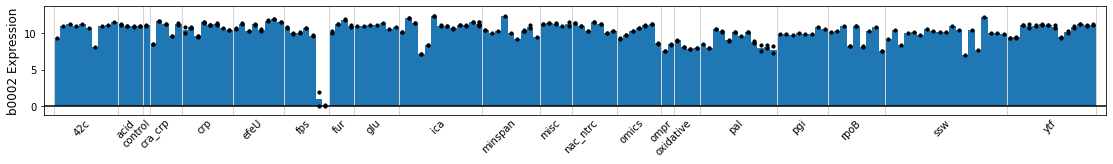

In [3]:
plot_expression(ica_data,'b0002')

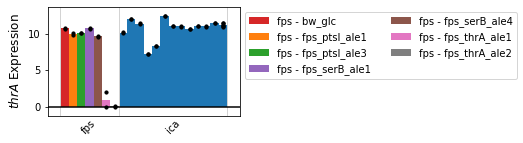

In [4]:
plot_expression(ica_data,'thrA',projects=['ica','fps'],highlight='fps')

## Plot iModulon Activities

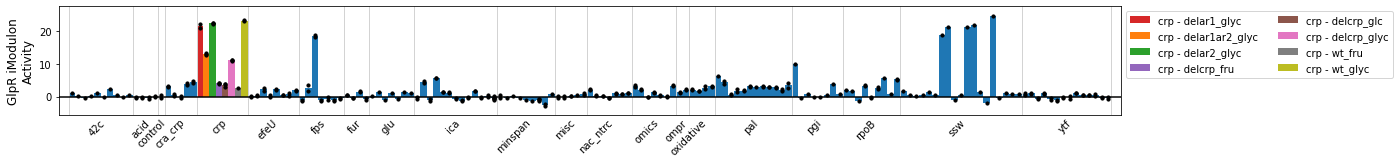

In [5]:
plot_activities(ica_data,'GlpR',highlight='crp')

## Plot sample metadata

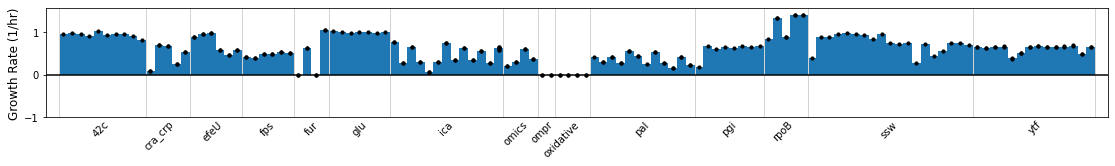

In [6]:
plot_metadata(ica_data,'Growth Rate (1/hr)')

# Scatterplots

Gene expression and iModulon activities can be compared with a scatter plot. Use the `compare_expression` and `compare_activities` functions, respectively. In addition, `compare_values` can be used to compare any compendium-wide value against another, including gene expression, iModulon activity, and sample metadata.

Optional arguments:
* `groups`: Mapping of samples to specific groups
* `show_labels`: Show labels for points. (default: `False`)
* `adjust_labels`: Automatically avoid label overlap
* `fit_metric`: Correlation metric of `'pearson'`,`'spearman'`, or `'r2adj'` (default: `'pearson'`)
* `ax`: Use a pre-existing axis (helpful if you want to manually determine the plot size)

Formatting arguments:
* `ax_font_args`: Arguments for label axes (e.g. `{'fontsize':16'}`) 
* `scatter_args`: Arguments for scatter plot (e.g. `{'s'=10}`)
* `label_font_args`: Arguments for text labels (e.g. `{'fontsize':8}`)
* `legend_args`: Arguments to pass to the legend (e.g. `{'fontsize':12, 'loc':0, 'ncol':2}`)

## Plot gene weights
`plot_gene_weights` will plot an iModulon's gene weights against its genomic position. If the number of genes in the iModulon is fewer than 20, it will also show the gene names (or locus tags, if gene name is unavailable).

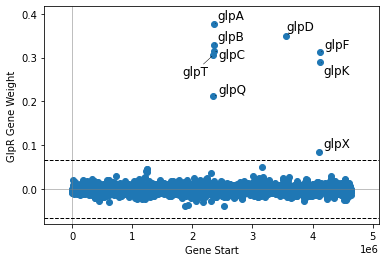

In [7]:
plot_gene_weights(ica_data,'GlpR')

If there are more than 20 genes, gene names will not be shown by default.

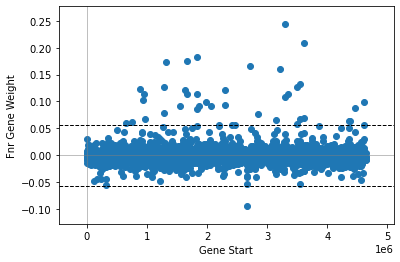

In [8]:
plot_gene_weights(ica_data,'Fnr')

Use `show_labels=True` show gene labels. It is advisable to turn of auto-adjustment of gene labels (`adjust_labels=False`), as this may take a while with many genes.

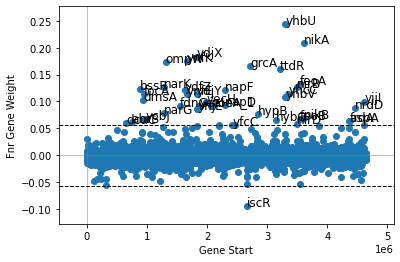

In [9]:
plot_gene_weights(ica_data,'Fnr',show_labels=True,adjust_labels=False)

## Compare two iModulon activities

In [10]:
groups = {'minspan__wt_glc_anaero__1':'Anaerobic',
          'minspan__wt_glc_anaero__2':'Anaerobic'}

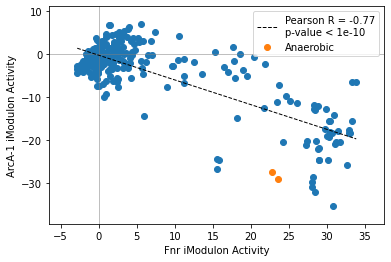

In [11]:
compare_activities(ica_data,'Fnr','ArcA-1',groups=groups)

## Compare two gene expression profiles

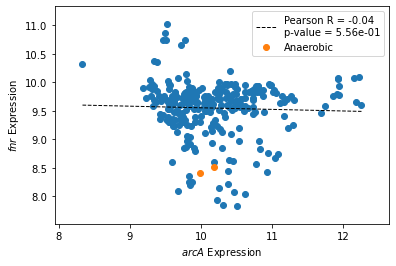

In [12]:
compare_expression(ica_data,'arcA','fnr',groups=groups)

## Compare iModulon gene weights

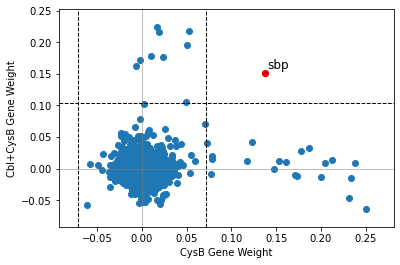

In [13]:
compare_gene_weights(ica_data,'CysB','Cbl+CysB')

## Compare iModulon gene weights across organisms

In [14]:
s_acid = load_json_model('../example_data/modulome_example/saci.json')

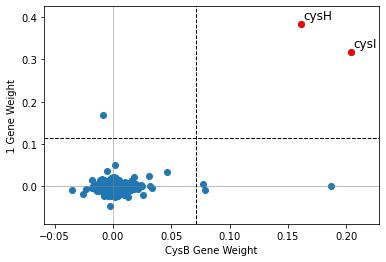

In [15]:
compare_gene_weights(ica_data,'CysB','1', ica_data2 = s_acid, 
                     ortho_file='../example_data/example_bbh.csv')

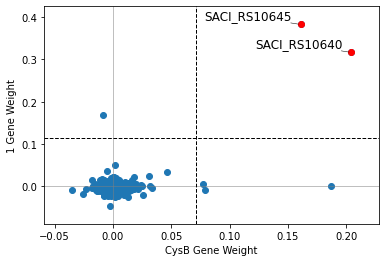

In [16]:
compare_gene_weights(ica_data,'CysB','1', ica_data2 = s_acid, 
                     ortho_file='../example_data/example_bbh.csv',
                     use_org1_names=False)

# Regulon plots
iModulon gene weights can be visualized in a histogram. If you wish to highlight genes in a regulon, it can be visualized either as overlapping bars, or side-by-side bars.

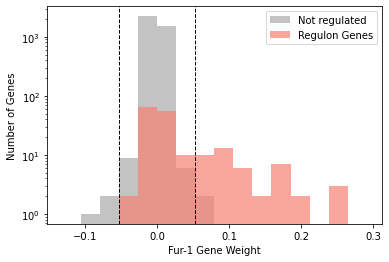

In [17]:
plot_regulon_histogram(ica_data,'Fur-1','fur')

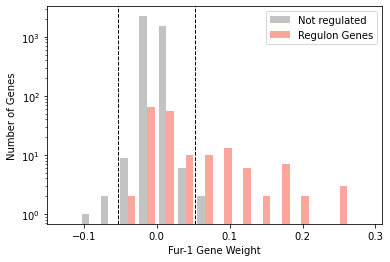

In [18]:
plot_regulon_histogram(ica_data,'Fur-1','fur',kind='side')

# Coming soon
1. Regulon venn diagrams